In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# from joblib import dump
# import pickle

#set path
import sys
import os
sys.path.insert(1, '../')
from utils.config_reader import config_reader

# Import parameters
config = config_reader('../config/config.json')

random_seed = config.random_seed
path_figures = config.path_figures
 
os.environ['PYTHONHASHSEED'] = str(random_seed)
np.random.seed(random_seed)

# Display fixed length of a dataframe
pd.set_option("display.max_rows", 9 )#"display.max_columns", 9
pd.options.display.max_colwidth = 150
# from utils.functions import Dickey_Fuller_test, optim_param, plot_acf_pacf

# Read data

In [13]:
data = pd.read_csv("../data/books.zip") #, parse_dates=["published_year"]
data = data[['title', 'authors', 'categories', 'published_year', 
'average_rating', 'num_pages', 'ratings_count', 'isbn13', 'isbn10','subtitle', 'description','thumbnail']]
data.head()

,title,authors,categories,published_year,average_rating,num_pages,ratings_count,isbn13,isbn10,subtitle,description,thumbnail
0,Gilead,Marilynne Robinson,Fiction,2004.0,3.85,247.0,361.0,9780002005883,0002005883,NaN,"A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. ...",http://books.google.com/books/content?id=KQZCPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api
1,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,2000.0,3.83,241.0,5164.0,9780002261982,0002261987,A Novel,A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed play by Charles Osborne Following BLACK COFFEE and THE UNEXPECTED...,http://books.google.com/books/content?id=gA5GPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api
2,The One Tree,Stephen R. Donaldson,American fiction,1982.0,3.97,479.0,172.0,9780006163831,0006163831,NaN,Volume Two of Stephen Donaldson's acclaimed second trilogy featuing the compelling anti-hero Thomas Covenant.,http://books.google.com/books/content?id=OmQawwEACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api
3,Rage of angels,Sidney Sheldon,Fiction,1993.0,3.93,512.0,29532.0,9780006178736,0006178731,NaN,"A memorable, mesmerizing heroine Jennifer -- brilliant, beautiful, an attorney on the way up until the Mafia's schemes win her the hatred of an im...",http://books.google.com/books/content?id=FKo2TgANz74C&printsec=frontcover&img=1&zoom=1&source=gbs_api
4,The Four Loves,Clive Staples Lewis,Christian life,2002.0,4.15,170.0,33684.0,9780006280897,0006280897,NaN,"Lewis' work on the nature of love divides love into four categories; Affection, Friendship, Eros and Charity. The first three come naturally to hu...",http://books.google.com/books/content?id=XhQ5XsFcpGIC&printsec=frontcover&img=1&zoom=1&source=gbs_api


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           6810 non-null   object 
 1   authors         6738 non-null   object 
 2   categories      6711 non-null   object 
 3   published_year  6804 non-null   float64
 4   average_rating  6767 non-null   float64
 5   num_pages       6767 non-null   float64
 6   ratings_count   6767 non-null   float64
 7   isbn13          6810 non-null   int64  
 8   isbn10          6810 non-null   object 
 9   subtitle        2381 non-null   object 
 10  description     6548 non-null   object 
 11  thumbnail       6481 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


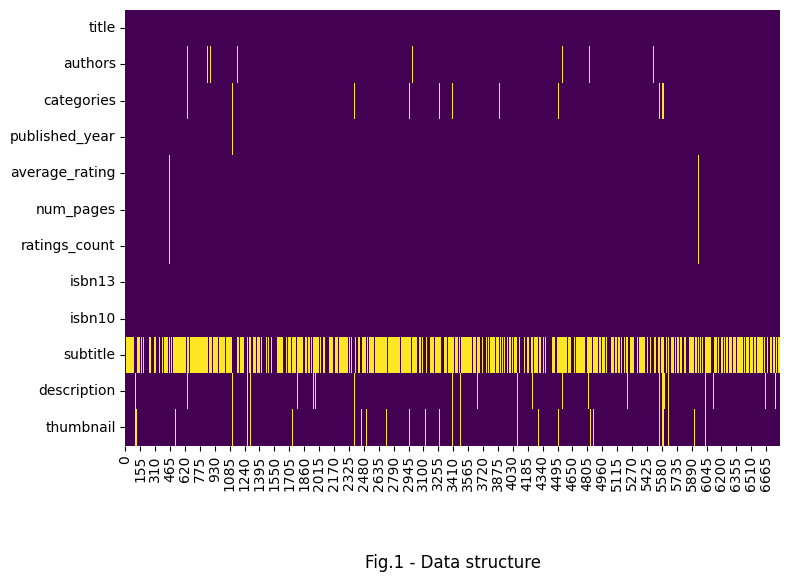

In [15]:
fig_id = 1
plt.figure(figsize=(8,6))
fig = sns.heatmap(data.isna().transpose(), cbar=False, cmap='viridis')
#ticks_y = ticker.FuncFormatter(lambda y, pos: '{:.0f}'.format(y/scale_factor_y))
#fig.yaxis.set_major_formatter(ticks_y)
#fig.yaxis.grid(linestyle=':')

plt.title("Fig.{} - Data structure".format(fig_id), y=-0.3)
#plt.ylabel("Billions usd")
plt.tight_layout()
#plt.savefig(os.path.join(path_figures, f'fig_{fig_id}.png'));

In [16]:
# difference between current year and the year of book publishing
data['book_age'] = (2025 - data["published_year"])
# mask = data['book_age'].isna() == True
# data[~mask]['book_age'] = data[~mask]['book_age'].astype('int16')
data.head(2)

,title,authors,categories,published_year,average_rating,num_pages,ratings_count,isbn13,isbn10,subtitle,description,thumbnail,book_age
0,Gilead,Marilynne Robinson,Fiction,2004.0,3.85,247.0,361.0,9780002005883,0002005883,NaN,"A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. ...",http://books.google.com/books/content?id=KQZCPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,21.0
1,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,2000.0,3.83,241.0,5164.0,9780002261982,0002261987,A Novel,A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed play by Charles Osborne Following BLACK COFFEE and THE UNEXPECTED...,http://books.google.com/books/content?id=gA5GPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,25.0


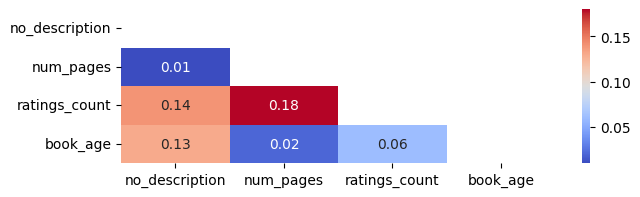

In [17]:
# check if there is a correlation between missing description and other features
data['no_description'] = np.where(data['description'].isna(), 1, 0)
cols = ['no_description', 'num_pages', 'ratings_count', 'book_age']

fig = plt.figure(figsize=(7, 2))
matrix = np.triu(data[cols].corr(method="spearman", numeric_only=True))
sns.heatmap(round(abs(data[cols].corr(method="spearman", numeric_only=True)), 2), 
    annot=True, cmap= 'coolwarm', mask=matrix);

The heatmap indicates that there is almost no correlation between the absence of description and other featurees. Let us separate them to another dataset.

In [18]:
idx = []
for i in ['description', 'published_year', 'average_rating', 'num_pages']:
    mask_1 = data[i].isna() == True
    [idx.append(x) for x in data[mask_1].index.to_list()]
idx = list(set(idx))
idx.sort()
print('First ten missing indexes are: {}'.format(idx[:5]))

mask = data.index.isin(idx) == True
missing, data = data[mask], data[~mask]
data.shape

First ten missing indexes are: [37, 60, 99, 102, 105]


(6507, 14)

## Data cleansing

In [19]:
data['categories'].value_counts().nlargest(9)

categories
Fiction                      2523
Juvenile Fiction              534
Biography & Autobiography     391
History                       258
Literary Criticism            164
Philosophy                    154
Comics & Graphic Novels       152
Religion                      136
Drama                         126
Name: count, dtype: int64

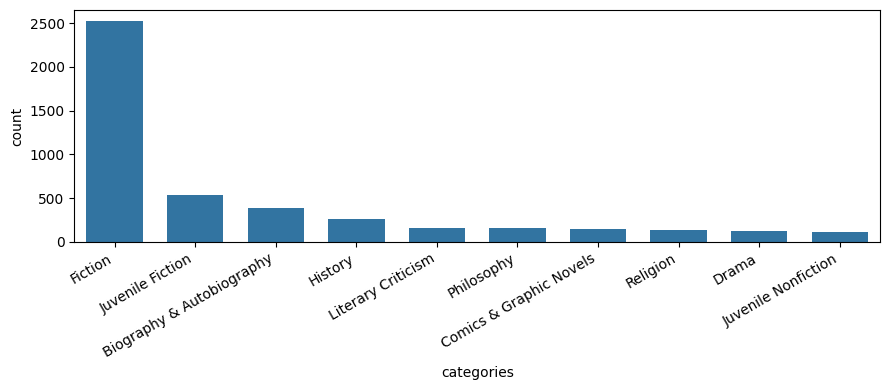

In [20]:
plt.figure(figsize=(9,4))
sns.barplot(data['categories'].value_counts().nlargest(10), width=0.7)
plt.xticks(rotation=30,  horizontalalignment='right')
plt.tight_layout();

### Descriptions

In [21]:
# Short descriptions
data['n_words_description'] = data['description'].str.split().str.len()
#np.where(data['n_words_description']<= 3, 1, 0)
mask = data['n_words_description'] >= 25
data = data[mask] 
print(data.shape)
data['description']

(5197, 15)


0       A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. ...
1       A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed play by Charles Osborne Following BLACK COFFEE and THE UNEXPECTED...
3       A memorable, mesmerizing heroine Jennifer -- brilliant, beautiful, an attorney on the way up until the Mafia's schemes win her the hatred of an im...
4       Lewis' work on the nature of love divides love into four categories; Affection, Friendship, Eros and Charity. The first three come naturally to hu...
                                                                                ...                                                                          
6803    This book tells the tale of a man who goes on a wonderful and amazing journey through Asia. His travels can also be seen as a parable of one perso...
6804    Wisdom to Create a Life of Passion, Purpose,

## Combination of values of the meaningful features into a single string

### Join title and subtitle

In [22]:
data['title_subtitle'] = np.where(data['subtitle'].isna(), data['title'], data[['title', 'subtitle']].astype(str).agg(": ".join, axis=1))
data['title_subtitle']

0                                                                                            Gilead
1                                                                             Spider's Web: A Novel
3                                                                                    Rage of angels
4                                                                                    The Four Loves
                                                   ...                                             
6803                                                                            Journey to the East
6804    The Monk Who Sold His Ferrari: A Fable About Fulfilling Your Dreams & Reaching Your Destiny
6805                                                 I Am that: Talks with Sri Nisargadatta Maharaj
6808                                                                       The Berlin Phenomenology
Name: title_subtitle, Length: 5197, dtype: object

In [23]:
# Join ISBN13
data['tagged_descr'] = data[['isbn13', 'description']].astype(str).agg(" ".join, axis=1)
data['tagged_descr']

0       9780002005883 A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of rema...
1       9780002261982 A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed play by Charles Osborne Following BLACK COFFEE and ...
3       9780006178736 A memorable, mesmerizing heroine Jennifer -- brilliant, beautiful, an attorney on the way up until the Mafia's schemes win her the h...
4       9780006280897 Lewis' work on the nature of love divides love into four categories; Affection, Friendship, Eros and Charity. The first three come n...
                                                                                ...                                                                          
6803    9788173031014 This book tells the tale of a man who goes on a wonderful and amazing journey through Asia. His travels can also be seen as a parabl...
6804    9788179921623 Wisdom to Create a Life of Pas

### remove useless columns

In [24]:
data.columns
data.drop(['subtitle', 'book_age', 'n_words_description', 'no_description'], axis=1, inplace=True)

# Text analysis

In [25]:
data['description']

0       A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. ...
1       A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed play by Charles Osborne Following BLACK COFFEE and THE UNEXPECTED...
3       A memorable, mesmerizing heroine Jennifer -- brilliant, beautiful, an attorney on the way up until the Mafia's schemes win her the hatred of an im...
4       Lewis' work on the nature of love divides love into four categories; Affection, Friendship, Eros and Charity. The first three come naturally to hu...
                                                                                ...                                                                          
6803    This book tells the tale of a man who goes on a wonderful and amazing journey through Asia. His travels can also be seen as a parable of one perso...
6804    Wisdom to Create a Life of Passion, Purpose,

## CountVectorizer

To apply Cosine similarity, we have to transform column text into a vector; all vectors can be merged into one matrix.

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer

# CV = CountVectorizer()
# count_matrix = CV.fit_transform(data['description'])

# cos_sim_matrix = cosine_sim(count_matrix)

# #cos_sim_matrix = linear_kernel(feature_matrix, feature_matrix)
# cos_sim_matrix.shape

In [26]:
# Vectroization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

t_vec = TfidfVectorizer(stop_words='english') #, ngram_range=(2, 2), max_features=5000

# Transorm descripttions into a matrix
feature_matrix = t_vec.fit_transform(data['description'])

# Estimate cosine similarity matrix
cosine_similarity_matrix = linear_kernel(feature_matrix, feature_matrix)
cosine_similarity_matrix.shape

(5197, 5197)

To increase the speed of our recommendation algorythm, we can also reduce the dimensiality of the cosine matrix in case its shape is large enough. As a result of simplification, for instance, by a factor of 2, our matrix will be smaller, but some information about original features will be lost. Therefore, recommendations of our algorithm might be less precise compared with those done with full cosine matrix.

In [27]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=int(round(cosine_similarity_matrix.shape[1] / 2, -2)))

# Fit transform the data
reduced_data = svd.fit_transform(cosine_similarity_matrix)
reduced_data.shape

(5197, 2600)

In [28]:
similarity = cosine_similarity(reduced_data) #cosine_similarity_matrix

def recommendation(book_title:str, n_recommendations:int=5):
    # total number of similar titles
    idx = data[data['title'].str.contains(book_title, case=False)].index[0]

    # vector of similarities sorted in descending order
    distances = similarity[idx]
    movie_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:n_recommendations+1]
    
    for i in movie_list:
        print(data.iloc[i[0]].title)

recommendation("Star Wars")

NameError: name 'cosine_similarity' is not defined

## openai

In [ ]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_chroma import Chroma
#!pip install transformers

In [ ]:
file_name = '../data/tagged_descr.txt'
data['tagged_descr'].to_csv(file_name, sep='\n', index=False, header=False)

In [ ]:
# Hides output while after model learned
from IPython.display import clear_output

In [ ]:
raw_description = TextLoader(file_name, encoding="utf8").load()
txt_splitter = CharacterTextSplitter(
    chunk_size=0, #closest sep
    chunk_overlap=0,
    separator='\n'
)
documents = txt_splitter.split_documents(raw_description)
clear_output(wait=False)

documents[0]

Document(metadata={'source': '../data/tagged_descr.txt'}, page_content='9780002005883 A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, 

In [ ]:
db_books = Chroma.from_documents(
    documents
)
#db_books

# Analyse recommendations

In [ ]:
import re
s = 'A NOVEL THAT READERS and critics have been'
re.findall('^(?:[\w-]+[^\w-]+){1}[\w-]+', s)
#^(?:[\w-]+[^\w-]+){2}[\w-]+

['A NOVEL']

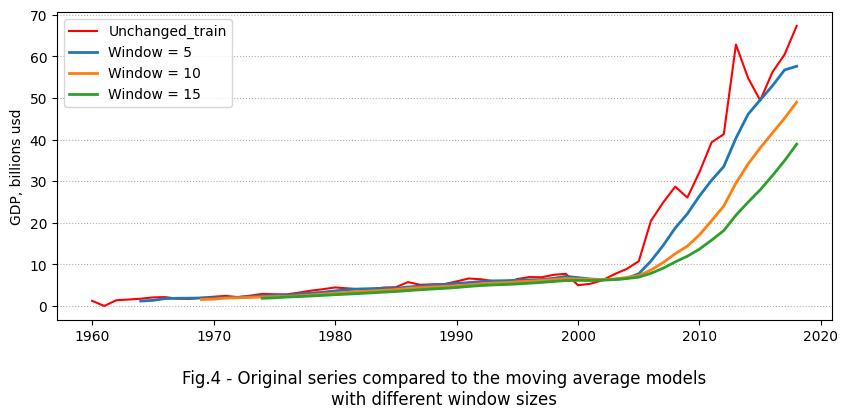

In [ ]:
# fig_id = 4
# fig, ax = plt.subplots(figsize=(10, 4))

# ax.plot(train, color="red", label="Unchanged_train")
# scale_factor_y = 1e9
# ticks_y = ticker.FuncFormatter(lambda y, pos: '{:.0f}'.format(y/scale_factor_y))
# ax.yaxis.set_major_formatter(ticks_y)
# ax.yaxis.grid(linestyle=':')

# window = np.linspace(5,15,3).astype("int8") # Set 3 window sizes: 5,10,15

# for i in range(window.shape[0]):
#     ax.plot(
#         train.rolling(window=window[i]).mean(),
#         label="Window = {}".format(window[i]),
#         linewidth=2
#     )
# plt.ylabel("GDP, billions usd")
# plt.legend()
# plt.title("Fig.{} - Original series compared to the moving average models\nwith different window sizes".format(fig_id), y=-0.3);

#### linear model

In [ ]:
X_train, X_test = np.arange(train.shape[0]).reshape(-1, 1), np.arange(test.shape[0]).reshape(-1, 1) #.fillna(0)
y_train, y_test = train.values, test.values

In [ ]:
# Instance
lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)
predictions_df['linear_predictions'] = lr.predict(X_test)

print("Root Mean Squared Error: {:.1f}".format(np.sqrt(mean_squared_error(
    predictions_df["volatility"].abs(), predictions_df["linear_predictions"]).round(2))))

display(predictions_df)

Root Mean Squared Error: 5.6


,volatility,arch_predictions,linear_predictions
year,,,
2019-01-01,1.542746,288.546011,8.641577
2020-01-01,2.495937,292.216032,8.788200
2021-01-01,10.780603,295.886053,8.934823
